# Clustering Restaurants in Sydney

**By Harry Ngo**    
This notebook is a continuation of my first project "[Exploring areas and venues in Sydney NSW, Australia](https://medium.com/@harryngo/exploring-areas-and-venues-of-sydney-nsw-australia-88c0cf4f3da2)". It will focus on restaurants and food related shops around stations in Sydney.

## Introduction

The aim of the project is to explore different restaurants and food cuisines in Sydney. We will use Foursquare API and K-means clustering to cluster similar areas of Sydney which have similar features. The target audience for this project are people who live in Sydney, especially public transport commuters, looking for areas where they would like to eat a certain food cuisine. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('sydney_trains.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Station,Latitude,Longitude
0,Allawah,-33.9697,151.1145
1,Arncliffe,-33.9362,151.1473
2,Artarmon,-33.8088,151.1851
3,Ashfield,-33.8876,151.1259
4,Asquith,-33.6887,151.1081


This data set contains all of Sydney's train and Metro stations, along with their respective coordinates in latitude and longitude. This will allow us to visualise the locations on a map of Sydney. The locations of stations were chosen as the majority of Sydney workers travel by public transport. Restaurants close to stations provide convenient options for residents.

Before we begin our analysis, the following libraries will be imported.

In [3]:
import numpy as np # library to handle data in a vectorized manner

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [4]:
print('The dataframe has', len(df['Station']), 'stations.')

The dataframe has 181 stations.


## Methodology and Analysis

Use geopy library to get the latitude and longitude values of Sydney

In [5]:
# Get geographical coordinates of Sydney, Australia
address = "Sydney, AU"

geolocator = Nominatim(user_agent="sydney_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Sydney, AU are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Sydney, AU are -33.8548157, 151.2164539.


Create a map of Sydney with stations superimposed on top

In [6]:
# create map of Sydney using latitude and longitude values
map_sydney = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, stat in zip(df['Latitude'], df['Longitude'], df['Station']):
    label = '{}'.format(stat)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sydney)  
    
map_sydney

Define Foursquare Credentials

In [7]:
CLIENT_ID = 'OOJQPJJQ53MGWUAXT0GUIXS54AC40GFD3WOVOYRCJ0QWIDWL' # your Foursquare ID
CLIENT_SECRET = '3ZSURTR2Q3344PUWY55GBI1VHP5AHFJQLBXAJZU0QK4E3EQD' # your Foursquare Secret
VERSION = '20180605' 

Create a function which retrieves all venues within the 'Food' Category (ID: 4d4b7105d754a06374d81259) for all of our data.

In [8]:
LIMIT = 300 # limit of number of venues returned by Foursquare API

radius = 1000 # define radius

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['venues']
        except KeyError:
            print("No food venues: {} ".format(name))
            continue;
            
        if len(results) == 0:
            print("No food venues: {} ".format(name))
        
        # return only relevant information for each nearby venue
        for v in results:
            try:
                venues_list.append([(
                    name, 
                    lat, 
                    lng, 
                    v['name'], 
                    v['location']['lat'], 
                    v['location']['lng'],  
                    v['categories'][0]['name'])])
            except IndexError:
                print("Index Error: {}".format(v['name']))

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Station', 
                  'Station Latitude', 
                  'Station Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [9]:
sydney_venues = getNearbyVenues(names=df['Station'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Allawah
Arncliffe
Artarmon
Ashfield
Asquith
Auburn
Banksia
Bankstown
Bardwell Park
Beecroft
Bella Vista
Belmore
Berala
Berowra
Beverly Hills
Bexley North
Birrong
Blacktown
Bondi Junction
Burwood
Cabramatta
Campbelltown
Campsie
Canley Vale
Canterbury
Caringbah
Carlton
Carramar
Castle Hill
Casula
Central
Chatswood
Cheltenham
Cherrybrook
Chester Hill
Circular Quay
Clarendon
Clyde
Como
No food venues: Como 
Concord West
Cronulla
Croydon
Denistone
Domestic Airport
Doonside
Dulwich Hill
East Hills
East Richmond
Eastwood
Edgecliff
Edmondson Park
Emu Plains
Engadine
Epping
Erskineville
Fairfield
Flemington
Glenfield
Gordon
Granville
Green Square
Guildford
Gymea
Harris Park
Heathcote
Helensburgh
No food venues: Helensburgh 
Hills Showground
Holsworthy
Homebush
Hornsby
Hurlstone Park
Hurstville
Ingleburn
International Airport
Jannali
Kellyville
No food venues: Kellyville 
Killara
Kings Cross
Kingsgrove
Kingswood
Kirrawee
Kogarah
Lakemba
Leightonfield
Leppington
No food venues: Leppington 
Leumea

In [10]:
print('{} food venues were returned by Foursquare.'.format(sydney_venues.shape[0]))

5565 food venues were returned by Foursquare.


In [12]:
sydney_venues.head()

,Station,Station Latitude,Station Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Allawah,-33.9697,151.1145,Allawah Cheeky Chicken,-33.969979,151.115485,BBQ Joint
1,Allawah,-33.9697,151.1145,New Goldlion,-33.970114,151.114899,Chinese Restaurant
2,Allawah,-33.9697,151.1145,Posch Thai,-33.970310,151.115230,Thai Restaurant
3,Allawah,-33.9697,151.1145,Yum Ciao,-33.970330,151.115840,Italian Restaurant
4,Allawah,-33.9697,151.1145,The Coffee House,-33.970156,151.115555,Café


In [37]:
# sydney_venues.to_csv('sydney_venues.csv')

I didn't want for stations with less than 9 venues to be in the data frame as they could influence our cluster analysis. Here, I remove stations with < 9 venues.

In [75]:
sydney_venues2 = pd.read_csv('sydney_venues.csv')

In [76]:
sydney_venues2.shape

(5458, 8)

In [77]:
sydney_venues2.groupby('Station').count().reset_index().head()

,Station,Unnamed: 0,Station Latitude,Station Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Allawah,13,13,13,13,13,13,13
1,Arncliffe,37,37,37,37,37,37,37
2,Artarmon,47,47,47,47,47,47,47
3,Ashfield,49,49,49,49,49,49,49
4,Auburn,50,50,50,50,50,50,50


In [78]:
sydney_venues2.groupby('Station').count().shape

(142, 7)

For this project, I wanted to have it so there are at least 9 food venues around the station so stations without food venues wouldn't affect the clustering significantly. We note that 39 stations were not obtained by the dataframe as they did not retrieve at least 9 food venues nearby the stations.

In [79]:
print('There are {} uniques categories.'.format(len(sydney_venues2['Venue Category'].unique())))

There are 175 uniques categories.


Analyzing each station...

In [80]:
# one hot encoding
sydney_onehot = pd.get_dummies(sydney_venues2[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sydney_onehot['Station'] = sydney_venues2['Station'] 

# move neighborhood column to the first column
fixed_columns = [sydney_onehot.columns[-1]] + list(sydney_onehot.columns[:-1])
sydney_onehot = sydney_onehot[fixed_columns]

sydney_onehot.head()

,Station,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,...,Truck Stop,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Xinjiang Restaurant,Yemeni Restaurant
0,Allawah,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Allawah,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Allawah,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Allawah,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Allawah,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's group rows by station and by taking the mean of the frequency of occurrence of each category.

In [81]:
sydney_grouped = sydney_onehot.groupby('Station').mean().reset_index()
sydney_grouped.head()

,Station,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,...,Truck Stop,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Xinjiang Restaurant,Yemeni Restaurant
0,Allawah,0.00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.076923,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1,Arncliffe,0.00,0.0,0.0,0.0,0.0,0.054054,0.054054,0.0,0.054054,...,0.0,0.0,0.0,0.027027,0.0,0.0,0.0,0.0,0.000000,0.0
2,Artarmon,0.00,0.0,0.0,0.0,0.0,0.042553,0.021277,0.0,0.063830,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3,Ashfield,0.00,0.0,0.0,0.0,0.0,0.040816,0.000000,0.0,0.040816,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.020408,0.0
4,Auburn,0.02,0.0,0.0,0.0,0.0,0.060000,0.020000,0.0,0.000000,...,0.0,0.1,0.0,0.000000,0.0,0.0,0.0,0.0,0.020000,0.0


In [82]:
# Function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Check the 10 most common venues at each station

In [83]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Station']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
food_venues_sorted = pd.DataFrame(columns=columns)
food_venues_sorted['Station'] = sydney_grouped['Station']

for ind in np.arange(sydney_grouped.shape[0]):
    food_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sydney_grouped.iloc[ind, :], num_top_venues)

food_venues_sorted.head()

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allawah,Thai Restaurant,Café,Chinese Restaurant,Coffee Shop,Food Truck,BBQ Joint,Italian Restaurant,Bakery,Yemeni Restaurant,Eastern European Restaurant
1,Arncliffe,Café,Pizza Place,Bakery,Burger Joint,Asian Restaurant,Australian Restaurant,BBQ Joint,Thai Restaurant,Chinese Restaurant,Lebanese Restaurant
2,Artarmon,Café,Pizza Place,Japanese Restaurant,Korean Restaurant,BBQ Joint,Thai Restaurant,Coffee Shop,Burger Joint,Asian Restaurant,Bakery
3,Ashfield,Chinese Restaurant,Café,Bubble Tea Shop,Sushi Restaurant,Japanese Restaurant,Shanghai Restaurant,Bakery,BBQ Joint,Thai Restaurant,Asian Restaurant
4,Auburn,Chinese Restaurant,Bakery,Turkish Restaurant,Pakistani Restaurant,Café,Asian Restaurant,Middle Eastern Restaurant,Lebanese Restaurant,Burger Joint,Restaurant


## K-means Clustering

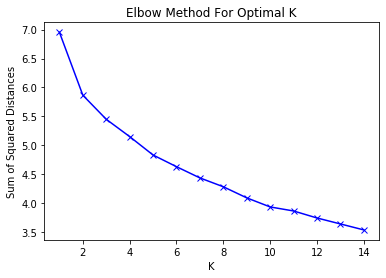

In [84]:
# Elbow method to find optimal K
import matplotlib.pyplot as plt

x = sydney_grouped.drop('Station', 1)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, random_state=5)
    km = km.fit(x)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal K')
plt.show()

The optimal k seems to be around 6, but just to be certain we will check using another method.

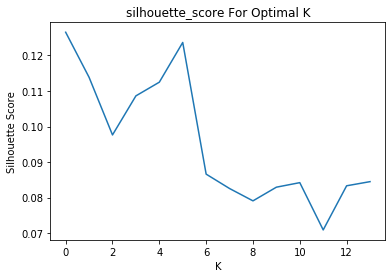

In [85]:
# Silhouette score method to find optimal K
from sklearn.metrics import silhouette_score

sil = []
kmax = 15

# minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k, random_state=5).fit(x)
  labels = kmeans.labels_
  sil.append(silhouette_score(x, labels, metric = 'euclidean'))

plt.plot(sil)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('silhouette_score For Optimal K')
plt.show()

Looking at the values, it reaches its highest peak at k=5.

**Cluster neighbourhoods by k-means into 5 clusters**

In [86]:
# set number of clusters
kclusters = 5

sydney_grouped_clustering = sydney_grouped.drop('Station', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sydney_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 3, 3, 4, 4, 2, 2, 3, 2, 3])

In [87]:
# add clustering labels
food_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sydney_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
sydney_merged = sydney_merged.join(food_venues_sorted.set_index('Station'), on='Station')

print(sydney_merged.shape)
sydney_merged.head() # check the cluster labels column!

(181, 14)


,Station,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allawah,-33.9697,151.1145,3.0,Thai Restaurant,Café,Chinese Restaurant,Coffee Shop,Food Truck,BBQ Joint,Italian Restaurant,Bakery,Yemeni Restaurant,Eastern European Restaurant
1,Arncliffe,-33.9362,151.1473,3.0,Café,Pizza Place,Bakery,Burger Joint,Asian Restaurant,Australian Restaurant,BBQ Joint,Thai Restaurant,Chinese Restaurant,Lebanese Restaurant
2,Artarmon,-33.8088,151.1851,3.0,Café,Pizza Place,Japanese Restaurant,Korean Restaurant,BBQ Joint,Thai Restaurant,Coffee Shop,Burger Joint,Asian Restaurant,Bakery
3,Ashfield,-33.8876,151.1259,4.0,Chinese Restaurant,Café,Bubble Tea Shop,Sushi Restaurant,Japanese Restaurant,Shanghai Restaurant,Bakery,BBQ Joint,Thai Restaurant,Asian Restaurant
4,Asquith,-33.6887,151.1081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
# 38 stations had NaN values as we removed them, so we drop them
sydney_merged = sydney_merged.dropna()
sydney_merged.shape

(142, 14)

In [89]:
# change cluster values to integer
sydney_merged['Cluster Labels'] = sydney_merged['Cluster Labels'].astype(int)

Let's find some labels for our clusters by creating a barplot of the most common venues to see how we can label them.

In [90]:
top_venue_count = sydney_merged
top_venue_count = top_venue_count.drop(['Station','Latitude','Longitude'], axis=1)
top_venue_count = top_venue_count.groupby(['Cluster Labels', '1st Most Common Venue']).size().reset_index(name='Count')
top_venue_count

,Cluster Labels,1st Most Common Venue,Count
0,0,BBQ Joint,1
1,0,Bakery,4
2,0,Café,9
3,0,Fast Food Restaurant,2
4,0,Indian Restaurant,5
5,0,Middle Eastern Restaurant,1
6,0,Sri Lankan Restaurant,1
7,1,Korean Restaurant,2
8,2,Café,35
9,3,Asian Restaurant,1


In [91]:
cluster_venue = top_venue_count.pivot(index='Cluster Labels', columns='1st Most Common Venue', values='Count')
# change NaN values to 0
cluster_venue = cluster_venue.fillna(0).astype(int).reset_index(drop=True)
cluster_venue

1st Most Common Venue,Asian Restaurant,BBQ Joint,Bakery,Burger Joint,Café,Chinese Restaurant,Coffee Shop,Fast Food Restaurant,Filipino Restaurant,Indian Restaurant,Korean Restaurant,Middle Eastern Restaurant,Pizza Place,Sandwich Place,Sri Lankan Restaurant,Thai Restaurant,Vietnamese Restaurant
0,0,1,4,0,9,0,0,2,0,5,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
2,0,0,0,0,35,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,51,0,6,1,0,0,0,1,0,0,0,2,1
4,1,0,1,1,1,8,0,0,1,0,1,0,2,1,0,0,2


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

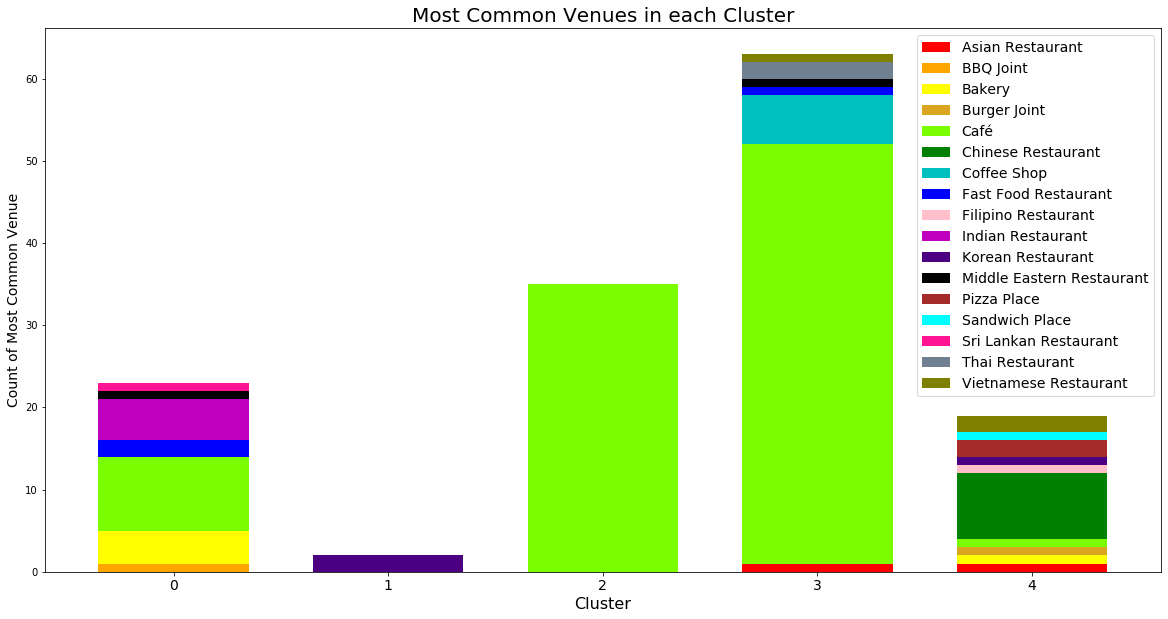

In [114]:
# Create a bar chart of most common venues of each cluster
my_colors = ['r','orange','yellow','goldenrod','lawngreen','g','c','b','pink','m','indigo','k','brown','cyan','deeppink','slategrey','olive','teal']
cv_plot = cluster_venue.plot(kind='bar', stacked=True,
                            figsize=(20,10), color=my_colors,
                            width=0.7)
plt.title("Most Common Venues in each Cluster", fontsize=20)
plt.xlabel("Cluster", fontsize=16)
plt.ylabel("Count of Most Common Venue", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1),labels=cluster_venue.columns, fontsize=14)
plt.xticks(rotation=0, fontsize=14)

We can generalize our labels as the following. Note that some stations may not fall into each cluster well.

In [118]:
cluster_label = {'Cluster':[0,1,2,3,4], 'Label':['Bakery/Cafe/Indian Restaurant Venues', 'Korean Restaurants', 'Cafe Venues', 'Cafe/Coffee/Thai Restaurant Venues','Chinese/Vietnamese/Pizza Restaurant Venues']}
cluster_label = pd.DataFrame(data=cluster_label)
cluster_label

,Cluster,Label
0,0,Bakery/Cafe/Indian Restaurant Venues
1,1,Korean Restaurants
2,2,Cafe Venues
3,3,Cafe/Coffee/Thai Restaurant Venues
4,4,Chinese/Vietnamese/Pizza Restaurant Venues


Let's also add the top 2 venues for each station on our map so we can see more information.

In [94]:
top_3 = sydney_venues2.groupby(['Station','Venue Category']).size().reset_index(name='Count')
top_3 = top_3.sort_values(['Station','Count'], ascending=False).groupby('Station').head(3).reset_index(drop=True)
# new column
top_3['Top Venues'] = top_3['Count'].map(str) + " " + top_3['Venue Category']
top_3 = top_3.groupby(['Station'])['Top Venues'].apply(", ".join).reset_index()
top_3.head()

,Station,Top Venues
0,Allawah,"3 Café, 3 Thai Restaurant, 2 Chinese Restaurant"
1,Arncliffe,"9 Café, 4 Bakery, 4 Pizza Place"
2,Artarmon,"8 Café, 4 Japanese Restaurant, 4 Pizza Place"
3,Ashfield,"8 Chinese Restaurant, 6 Café, 3 Bubble Tea Shop"
4,Auburn,"6 Chinese Restaurant, 5 Bakery, 5 Turkish Rest..."


In [119]:
df_sydney = sydney_merged.merge(top_3[['Station', 'Top Venues']], left_on='Station', right_on='Station')
df_sydney = df_sydney.merge(cluster_label[['Cluster', 'Label']], left_on='Cluster Labels', right_on='Cluster')
df_sydney = df_sydney.drop(['Cluster'], axis=1)
df_sydney.head()

,Station,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Top Venues,Label
0,Allawah,-33.9697,151.1145,3,Thai Restaurant,Café,Chinese Restaurant,Coffee Shop,Food Truck,BBQ Joint,Italian Restaurant,Bakery,Yemeni Restaurant,Eastern European Restaurant,"3 Café, 3 Thai Restaurant, 2 Chinese Restaurant",Cafe/Coffee/Thai Restaurant Venues
1,Arncliffe,-33.9362,151.1473,3,Café,Pizza Place,Bakery,Burger Joint,Asian Restaurant,Australian Restaurant,BBQ Joint,Thai Restaurant,Chinese Restaurant,Lebanese Restaurant,"9 Café, 4 Bakery, 4 Pizza Place",Cafe/Coffee/Thai Restaurant Venues
2,Artarmon,-33.8088,151.1851,3,Café,Pizza Place,Japanese Restaurant,Korean Restaurant,BBQ Joint,Thai Restaurant,Coffee Shop,Burger Joint,Asian Restaurant,Bakery,"8 Café, 4 Japanese Restaurant, 4 Pizza Place",Cafe/Coffee/Thai Restaurant Venues
3,Bardwell Park,-33.9316,151.1249,3,Café,Bakery,Pizza Place,Thai Restaurant,Chinese Restaurant,Fish & Chips Shop,Greek Restaurant,Bar,Kebab Restaurant,BBQ Joint,"6 Café, 3 Bakery, 2 Chinese Restaurant",Cafe/Coffee/Thai Restaurant Venues
4,Bella Vista,-33.7306,150.9440,3,Café,Coffee Shop,Thai Restaurant,Pizza Place,Sandwich Place,Indian Restaurant,Afghan Restaurant,Italian Restaurant,Portuguese Restaurant,Chinese Restaurant,"8 Café, 4 Coffee Shop, 3 Thai Restaurant",Cafe/Coffee/Thai Restaurant Venues


In [121]:
# df_sydney.to_csv('df_sydney_merged.csv')
df_sydney = pd.read_csv('df_sydney_merged.csv')

## Results

Finally, let's create our final map displaying clusters with information

In [122]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]

rainbow = ['#2adddd', '#8e4fcc', '#3c56d6', '#e74747','#f0e609']
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, lbl, top_v in zip(
        df_sydney['Latitude'], 
        df_sydney['Longitude'], 
        df_sydney['Station'], 
        df_sydney['Cluster Labels'],
        df_sydney['Label'],
        df_sydney['Top Venues']):
    label = folium.Popup(str(poi) + ', ' + ' Cluster ' + str(cluster) + ' - ' + str(lbl) + ' | ' + str(top_v), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

## Conclusion

To conclude, our analysis has created 5 different clusters for Sydney train and Metro stations which have at least 9 food venues around them. 
We have:
* Cluster 0 (yellow) - 23 stations, Bakery/Cafe/Indian Restaurant Venues
* Cluster 1 (cyan) - 2 stations, Korean Restaurants
* Cluster 2 (purple) - 35 stations, Cafe Venues
* Cluster 3 (blue) - 63 stations, Cafe/Coffee/Thai Restaurant Venues
* Cluster 4 (red) - 19 stations, Chinese/Vietnamese/Pizza Restaurant Venues

Next time when you go out to eat via public transport, you could look at this map to give a good idea of what types of foods are offered at stations with surrounding food venues.